<a href="https://colab.research.google.com/github/huynhspm/ML-DL/blob/main/Image%20Classification/Cifar10_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification Project**

In [1]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import time

In [2]:
# 2. Load dữ liệu cifar
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

img_width = 32
img_height = 32
img_channel = 3

label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


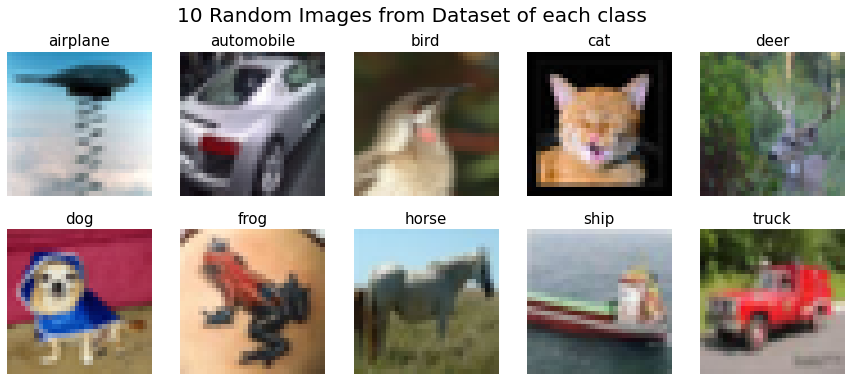

In [3]:
# 3. Show image
def get_ten_random_images():
  d = {}
  while len(d.keys()) < 10:
      idx = random.randint(0, len(y_train)-1)
      if y_train[idx][0] not in d.keys():
          d[y_train[idx][0]] = idx
  return d

d = get_ten_random_images()
rows = 2
cols = 5
fig, axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]])
    axes[i-1].axis('off')
    axes[i-1].set_title(label[i-1], fontsize=15)
fig.suptitle('10 Random Images from Dataset of each class', fontsize = 20)
plt.show()

In [4]:
# 4. Prepare data
img_width = 32
img_height = 32
img_channel = 3

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
 
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
# 5. Build model
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_regularizer='l2', input_shape=(img_width, img_height, img_channel)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [6]:
# 6. Train model
start_time = time.time()

numOfEpoch = 30
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2,
                                            verbose = 1, factor = 0.5, min_lr = 0.00001)
model_checkpoint = ModelCheckpoint(filepath='model.h5', 
                                   monitor='val_acc', mode='max', save_best_only=True)
H = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=numOfEpoch, 
              verbose=1, callbacks=[earlystop,learning_rate_reduction])

end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

Epoch 1/30
1250/1250 [==============================] - 26s 10ms/step - loss: 4.7324 - accuracy: 0.3749 - val_loss: 3.3421 - val_accuracy: 0.4773 - lr: 0.0010
Epoch 2/30
1250/1250 [==============================] - 9s 7ms/step - loss: 2.5702 - accuracy: 0.4929 - val_loss: 2.7657 - val_accuracy: 0.3695 - lr: 0.0010
Epoch 3/30
1250/1250 [==============================] - 10s 8ms/step - loss: 1.8646 - accuracy: 0.5791 - val_loss: 1.5524 - val_accuracy: 0.6445 - lr: 0.0010
Epoch 4/30
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6538 - accuracy: 0.6188 - val_loss: 1.5001 - val_accuracy: 0.6596 - lr: 0.0010
Epoch 5/30
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5239 - accuracy: 0.6403 - val_loss: 1.7598 - val_accuracy: 0.5422 - lr: 0.0010
Epoch 6/30
1242/1250 [============================>.] - ETA: 0s - loss: 1.5006 - accuracy: 0.6449
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1250/1250 [==========================

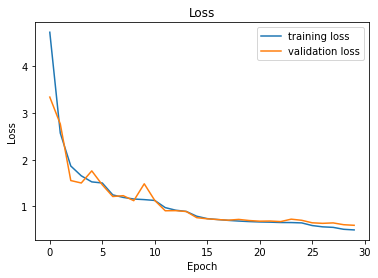

In [7]:
# 7. Vẽ đồ thị loss của traning set và validation set
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

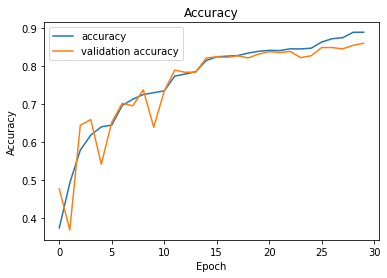

In [8]:
# 8. Vẽ đồ thị accuracy của traning set và validation set
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [9]:
# 9.Đánh giá model với testset
start_time = time.time()
print('[loss, accuracy]: ', model.evaluate(X_test, y_test, verbose = 1))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

313/313 [==============================] - 1s 4ms/step - loss: 0.6088 - accuracy: 0.8531
[loss, accuracy]:  [0.6087884306907654, 0.8531000018119812]
Running time: 1.56 (s)


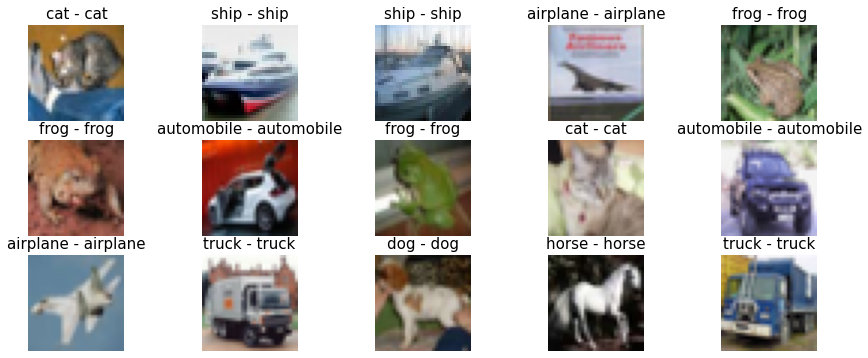

In [10]:
# 10. Show predict on testset
rows = 3
cols = 5

y_pred = model.predict(X_test[0: rows * cols])
y_pred = np.argmax(y_pred, axis = 1)

fig, axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(rows*cols):
    axes[i].imshow(X_test[i])
    axes[i].axis('off')
    axes[i].set_title(label[y_pred[i]] + ' - ' + label[int(y_test[i])], fontsize=15)

In [ ]:
# 11. Load ảnh
from google.colab import files
uploaded = files.upload()

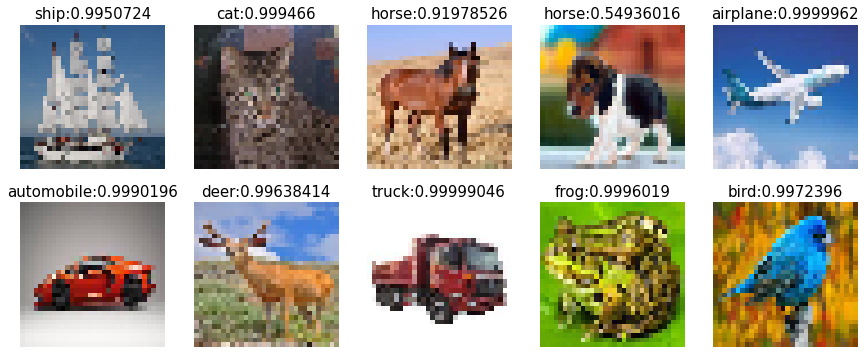

In [40]:
# 12. Predict ảnh mạng
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import os


dir_path = '/content/Test_Cifar10/'
imgs = []
for name in os.listdir(dir_path):
    img = cv2.imread(dir_path + name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(src=img, dsize=(img_width, img_height))/255.0
  
    imgs.append(img)

imgs = np.array(imgs)
pred = model.predict(imgs)

y = np.argmax(pred, 1)
pred = np.max(pred, 1)

rows = 2
cols = 5
fig, axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(rows*cols):
    axes[i].imshow(imgs[i])
    axes[i].axis('off')
    axes[i].set_title(label[y[i]] + ':' + str(pred[i]), fontsize=15)

In [41]:
# 13. save model 
model.save('Cifar10_Model.h5')